113617.27024144215 1.0


<ipython-input-1-0076c632495a>:98: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


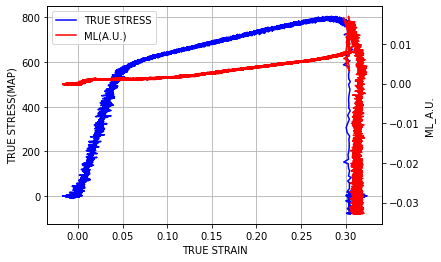

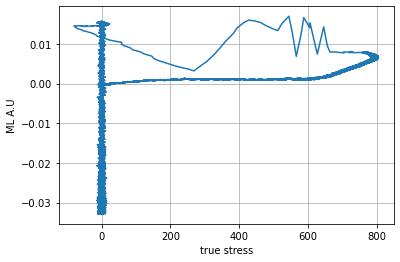

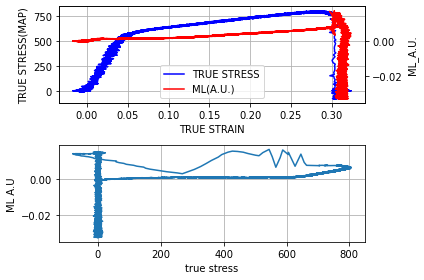

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pylab as plt
import pandas as pd
import fracture

#csv파일 형식 바꾸기!

"""setting values"""
path = 'D:/experiment data/aluminum/2020-10-07/1/img'
path_save= 'd:/experiment data/aluminum/2020-10-07/1'
tension_section = 18
gauge_length = 20



#part2 , location must be x1<x2, y1<y2

slice_x1 = 95
slice_x2 = 180
slice_y1 = 139
slice_y2 = 534

file_list = os.listdir(path)
count = 0
result = []

for file in file_list:
    if file.endswith(".jpg"):
        im = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)/255
        im_calculate = np.array(im)
        img_box = im_calculate[slice_y1:slice_y2, slice_x1:slice_x2]
        ave = np.average(img_box)
        result = np.append(result, [ave])
        count += 1



ml_avg = result - result[0]
tension_data = np.array(pd.read_csv(path+'/tension.csv', encoding='CP949'))
time, strain, stress = tension_data[:, 1], tension_data[:, 4]/gauge_length, tension_data[:, 3]/tension_section
true_stress, true_strain = fracture.true_ss(stress, strain)
ml_A = ml_avg[:]


data = {'time': time, 'strain': strain, 'stress': stress,
        'true_strain': true_strain, 'true_stress': true_stress,
        'ML': ml_A}
df = pd.DataFrame(data)
df.to_csv(path_save+'/data.csv')

<ipython-input-5-ec61ba7b0d0b>:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


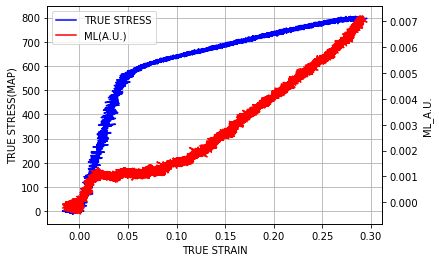

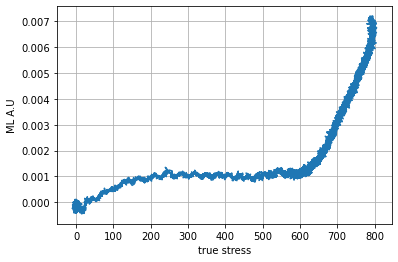

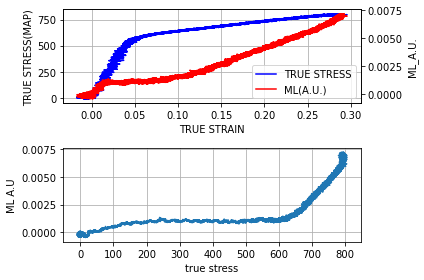

In [5]:
true_stress=true_stress[:23000]
true_strain=true_strain[:23000]
ml_A=ml_A[:23000]

#graph part
#############
fig, ax = plt.subplots()
ax1 = ax.twinx()
ax.set_xlabel('TRUE STRAIN')
ax.set_ylabel('TRUE STRESS(MAP)')
ax1.set_ylabel('ML_A.U.')
line1 = ax.plot(true_strain, true_stress, color='b', label="TRUE STRESS")
line2 = ax1.plot(true_strain, ml_A, color='r', label="ML(A.U.)")
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc=0)
ax.grid()
fig.savefig(path_save+'/graph.png', dpi = 300)

fig, ax2 = plt.subplots()
ax2.plot(true_stress, ml_A)
ax2.grid()
ax2.set_xlabel('true stress')
ax2.set_ylabel('ML A.U')
fig.savefig(path_save+'/graph1.png', dpi = 300)
##############

fig, ax = plt.subplots(2, 1)
ax0 = ax[0].twinx()
ax[0].set_xlabel('TRUE STRAIN')
ax[0].set_ylabel('TRUE STRESS(MAP)')
ax0.set_ylabel('ML_A.U.')
line1 = ax[0].plot(true_strain, true_stress, color='b', label="TRUE STRESS")
line2 = ax0.plot(true_strain, ml_A, color='r', label= "ML(A.U.)")

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax[0].legend(lines, labels, loc=0)
ax[0].grid()

ax[1].plot(true_stress, ml_A)
ax[1].grid()
ax[1].set_xlabel('true stress')
ax[1].set_ylabel('ML A.U')

fig.tight_layout()
fig.savefig(path_save+'/graph2.png', dpi = 300)
fig.show()

In [ ]:
2번샘플

In [7]:
import numpy as np
import cv2
import os
import matplotlib.pylab as plt
import pandas as pd
import fracture

#csv파일 형식 바꾸기!

"""setting values"""
path = 'D:/experiment data/aluminum/2020-10-07/2/img'
path_save= 'd:/experiment data/aluminum/2020-10-07/2'
tension_section = 18
gauge_length = 20



#part2 , location must be x1<x2, y1<y2

slice_x1 = 97
slice_x2 = 155
slice_y1 = 175
slice_y2 = 404

file_list = os.listdir(path)
count = 0
result = []

for file in file_list:
    if file.endswith(".jpg"):
        im = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)/255
        im_calculate = np.array(im)
        img_box = im_calculate[slice_y1:slice_y2, slice_x1:slice_x2]
        ave = np.average(img_box)
        result = np.append(result, [ave])
        count += 1



ml_avg = result - result[0]
tension_data = np.array(pd.read_csv(path+'/tension.csv', encoding='CP949'))
time, strain, stress = tension_data[:, 1], tension_data[:, 4]/gauge_length, tension_data[:, 3]/tension_section
true_stress, true_strain = fracture.true_ss(stress, strain)
ml_A = ml_avg[:]


data = {'time': time, 'strain': strain, 'stress': stress,
        'true_strain': true_strain, 'true_stress': true_stress,
        'ML': ml_A}
df = pd.DataFrame(data)
df.to_csv(path_save+'/data.csv')

<ipython-input-8-bbf50d99b50e>:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


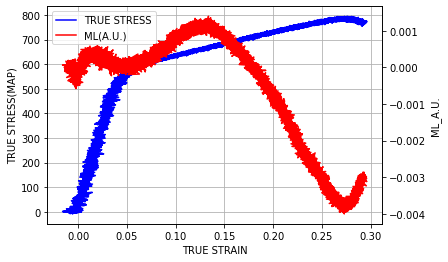

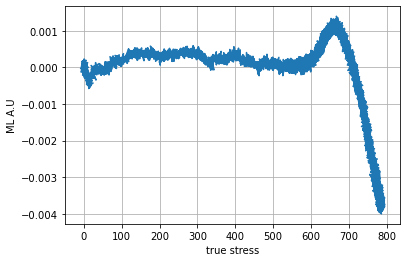

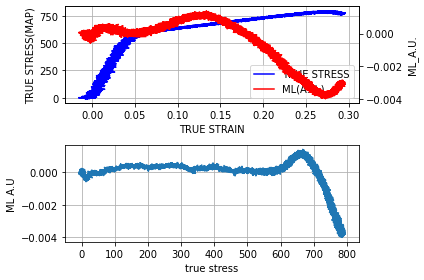

In [8]:
true_stress=true_stress[2566:30803]
true_strain=true_strain[2566:30803]
ml_A=ml_A[2566:30803]

#graph part
#############
fig, ax = plt.subplots()
ax1 = ax.twinx()
ax.set_xlabel('TRUE STRAIN')
ax.set_ylabel('TRUE STRESS(MAP)')
ax1.set_ylabel('ML_A.U.')
line1 = ax.plot(true_strain, true_stress, color='b', label="TRUE STRESS")
line2 = ax1.plot(true_strain, ml_A, color='r', label="ML(A.U.)")
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc=0)
ax.grid()
fig.savefig(path_save+'/graph.png', dpi = 300)

fig, ax2 = plt.subplots()
ax2.plot(true_stress, ml_A)
ax2.grid()
ax2.set_xlabel('true stress')
ax2.set_ylabel('ML A.U')
fig.savefig(path_save+'/graph1.png', dpi = 300)
##############

fig, ax = plt.subplots(2, 1)
ax0 = ax[0].twinx()
ax[0].set_xlabel('TRUE STRAIN')
ax[0].set_ylabel('TRUE STRESS(MAP)')
ax0.set_ylabel('ML_A.U.')
line1 = ax[0].plot(true_strain, true_stress, color='b', label="TRUE STRESS")
line2 = ax0.plot(true_strain, ml_A, color='r', label= "ML(A.U.)")

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax[0].legend(lines, labels, loc=0)
ax[0].grid()

ax[1].plot(true_stress, ml_A)
ax[1].grid()
ax[1].set_xlabel('true stress')
ax[1].set_ylabel('ML A.U')

fig.tight_layout()
fig.savefig(path_save+'/graph2.png', dpi = 300)
fig.show()

